In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [34]:
data = pd.read_csv("/content/drive/MyDrive/Deep learning/machine learning project/test.csv")

#Data Preprocessing

In [35]:
data.head(5)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [36]:
data.shape

(300, 2)

In [37]:
X = data["x"]
y = data["y"]

In [38]:
X

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [39]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


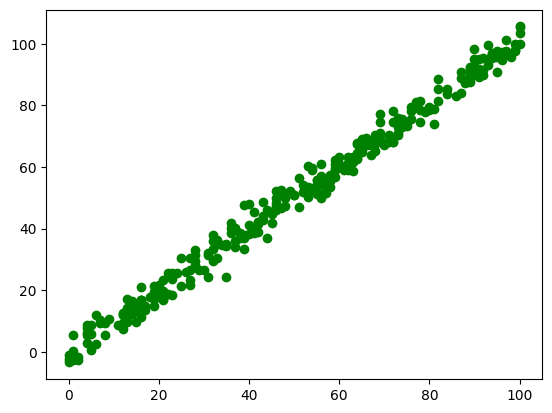

In [40]:
plt.scatter(X, y, c='g')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape, X_test.shape

((240,), (60,))

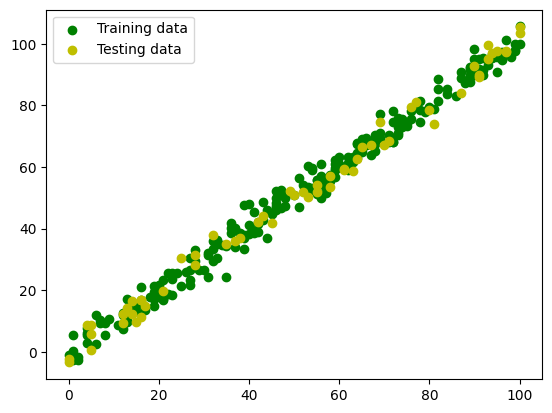

In [53]:
plt.scatter(X_train, y_train, c='g', label='Training data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

#Model Building

In [44]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
             metrics = ["mae"])

# train the model
epoch_number = 10
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 28.9728 - mae: 28.9728
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1174 - mae: 8.1174    
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5992 - mae: 4.5992 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7744 - mae: 3.7744 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8394 - mae: 3.8394 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4104 - mae: 4.4104 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2814 - mae: 3.2814 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4223 - mae: 3.4223 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8826 - mae: 4.8826 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0502 - mae: 4.0502 


In [45]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [46]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([[87.85427  ],
       [74.16605  ],
       [91.7652   ],
       [ 4.7471857],
       [88.83201  ]], dtype=float32)

In [47]:
y_test[:5]

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


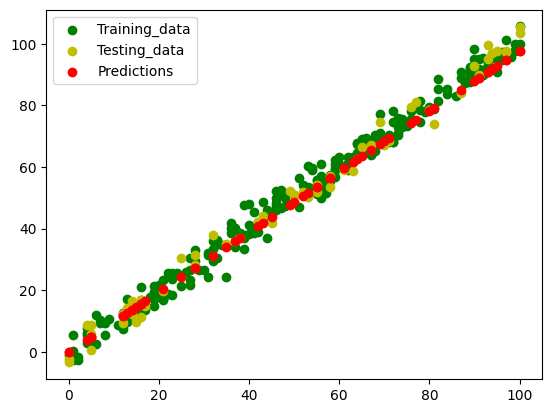

In [48]:
plt.scatter(X_train, y_train, c='g', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

#Evaluate Model

In [49]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 2.9204 - mae: 2.9204


[2.745469093322754, 2.745469093322754]

In [50]:
import tensorflow as tf

# Instantiate the MeanAbsoluteError class
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, tf.squeeze(y_pred))

# Get the result
mae_value = mae_metric.result().numpy()
print(mae_value)

2.745469


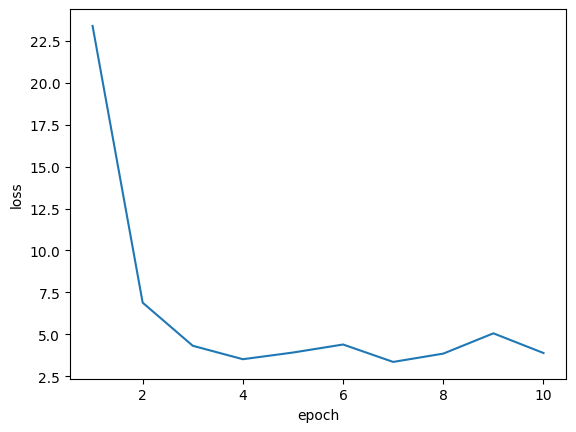

In [51]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [52]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[ 1.80086605e-02 -3.26304836e-03  1.23235593e-02  6.08959459e-02
  -4.87062661e-03  1.19403899e-02  1.17460359e-02 -1.55056223e-01
   4.78336029e-03 -3.41736645e-01 -2.07713252e-04 -3.61549389e-03
   2.26003248e-02  9.32248831e-02 -8.50233540e-04 -4.54940759e-02
   7.22281486e-02  8.42588302e-03 -3.36402841e-02  1.05234457e-03
   1.13801705e-02  1.35070547e-01  1.49006337e-01 -3.19162637e-01
  -1.53535546e-03  3.56021384e-03  2.27421466e-02 -2.31843931e-03
  -1.26235373e-03  1.33290868e-02  3.63804132e-01 -6.33491650e-02
  -3.86814936e-05 -3.57294500e-01 -3.04725081e-01 -1.58295065e-01
   2.77841568e-01  2.67373454e-02  4.48791943e-02 -4.51025255e-02
   1.67414099e-01 -2.87006855e-01  2.36217678e-03 -1.42738828e-03
  -1.29286805e-02  2.48811464e-03 -2.22048792e-03  1.68923348e-01
  -1.09361574e-01  3.74525189e-01 -3.10737312e-01  1.75622240e-01
   1.19056836e-01  2.56625079e-02 -2.11540964e-02  1.53965717e-02
   7.41624609e-02 -1.83096100e-02  4.19421680e-03 -2.07108278e-02